<a href="https://colab.research.google.com/github/mohdabdulrahman297/Project-predict-the-CTC-Salary-of-new-hires/blob/main/Project_predict_the_CTC_Salary_of_new_hires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Necessary libraries

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression


## Import dataset (train data)

In [ ]:
data = pd.read_csv('/content/Data_file.xlsx - Data.csv')

## Data Preprocessing (train data)

In [ ]:
# step 1
data.head()

,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,1,Tier 1,Manager,Non-Metro,"55,523.00",3,66,19,"71,406.58"
1,2,Tier 2,Executive,Metro,"57,081.00",1,84,18,"68,005.87"
2,3,Tier 2,Executive,Metro,"60,347.00",2,52,28,"76,764.02"
3,4,Tier 3,Executive,Metro,"49,010.00",2,81,33,"82,092.39"
4,5,Tier 3,Executive,Metro,"57,879.00",4,74,32,"73,878.10"


In [ ]:
# drop the columns (the columns that are mutual in both train and test data)
data = data.drop('S.No.',axis = 1)

In [ ]:
# diplaying first few rows
data.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,Tier 1,Manager,Non-Metro,"55,523.00",3,66,19,"71,406.58"
1,Tier 2,Executive,Metro,"57,081.00",1,84,18,"68,005.87"
2,Tier 2,Executive,Metro,"60,347.00",2,52,28,"76,764.02"
3,Tier 3,Executive,Metro,"49,010.00",2,81,33,"82,092.39"
4,Tier 3,Executive,Metro,"57,879.00",4,74,32,"73,878.10"


In [ ]:
# types of data types 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   College               1338 non-null   object
 1   Role                  1338 non-null   object
 2   City type             1338 non-null   object
 3   Previous CTC          1338 non-null   object
 4   Previous job changes  1338 non-null   int64 
 5   Graduation marks      1338 non-null   int64 
 6   Exp (Months)          1338 non-null   int64 
 7   CTC                   1338 non-null   object
dtypes: int64(3), object(5)
memory usage: 83.8+ KB


In [ ]:
# null values
data.isnull().sum()

College                 0
Role                    0
City type               0
Previous CTC            0
Previous job changes    0
Graduation marks        0
Exp (Months)            0
CTC                     0
dtype: int64

In [ ]:
# duplicate values
data.duplicated().sum()

0

## Data visualization

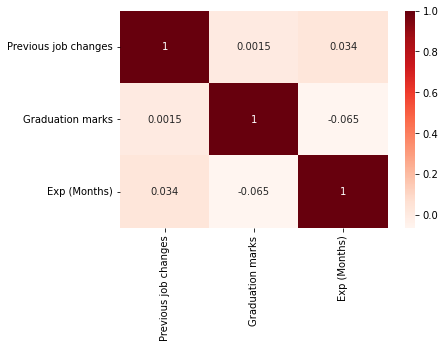

In [ ]:
# correlation matrix
sns.heatmap(data.corr() ,cmap = 'Reds' , linecolor = 'white', annot=True)


In [ ]:
# step 2 
# Transform categorical variables to the numerical variables
data = pd.get_dummies(columns=['College',	'Role'	,'City type'],data=data)

In [ ]:
data.head()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_Tier 1,College_Tier 2,College_Tier 3,Role_Executive,Role_Manager,City type_Metro,City type_Non-Metro
0,"55,523.00",3,66,19,"71,406.58",1,0,0,0,1,0,1
1,"57,081.00",1,84,18,"68,005.87",0,1,0,1,0,1,0
2,"60,347.00",2,52,28,"76,764.02",0,1,0,1,0,1,0
3,"49,010.00",2,81,33,"82,092.39",0,0,1,1,0,1,0
4,"57,879.00",4,74,32,"73,878.10",0,0,1,1,0,1,0


In [ ]:
data.head()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_Tier 1,College_Tier 2,College_Tier 3,Role_Executive,Role_Manager,City type_Metro,City type_Non-Metro
0,"55,523.00",3,66,19,"71,406.58",1,0,0,0,1,0,1
1,"57,081.00",1,84,18,"68,005.87",0,1,0,1,0,1,0
2,"60,347.00",2,52,28,"76,764.02",0,1,0,1,0,1,0
3,"49,010.00",2,81,33,"82,092.39",0,0,1,1,0,1,0
4,"57,879.00",4,74,32,"73,878.10",0,0,1,1,0,1,0


In [ ]:
# here in the CTC and Previous CTC column we can notice that ',' is considered as a string 
data['CTC'] = data['CTC'].str.replace(',','')
data['Previous CTC'] = data['Previous CTC'].str.replace(',','')

In [ ]:
data.head()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_Tier 1,College_Tier 2,College_Tier 3,Role_Executive,Role_Manager,City type_Metro,City type_Non-Metro
0,55523.00,3,66,19,71406.58,1,0,0,0,1,0,1
1,57081.00,1,84,18,68005.87,0,1,0,1,0,1,0
2,60347.00,2,52,28,76764.02,0,1,0,1,0,1,0
3,49010.00,2,81,33,82092.39,0,0,1,1,0,1,0
4,57879.00,4,74,32,73878.10,0,0,1,1,0,1,0


In [ ]:
# as per the above table the columns are are in unstructured format
data = data[['College_Tier 1' , 'College_Tier 2' , 	'College_Tier 3' , 'Role_Manager' , 'Role_Executive' , 'City type_Metro' , 	'City type_Non-Metro' , 'Graduation marks' , 'Previous job changes' , 'Exp (Months)','Previous CTC' , 'CTC' ]]

In [ ]:
data.head()

,College_Tier 1,College_Tier 2,College_Tier 3,Role_Manager,Role_Executive,City type_Metro,City type_Non-Metro,Graduation marks,Previous job changes,Exp (Months),Previous CTC,CTC
0,1,0,0,1,0,0,1,66,3,19,55523.00,71406.58
1,0,1,0,0,1,1,0,84,1,18,57081.00,68005.87
2,0,1,0,0,1,1,0,52,2,28,60347.00,76764.02
3,0,0,1,0,1,1,0,81,2,33,49010.00,82092.39
4,0,0,1,0,1,1,0,74,4,32,57879.00,73878.10


In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
print(X)

[[1 0 0 ... 3 19 '55523.00']
 [0 1 0 ... 1 18 '57081.00']
 [0 1 0 ... 2 28 '60347.00']
 ...
 [0 1 0 ... 1 18 '61957.00']
 [1 0 0 ... 3 21 '53203.00']
 [0 0 1 ... 1 61 '51820.00']]


In [ ]:
print(y)

['71406.58' '68005.87' '76764.02' ... '66397.77' '64044.38' '83346.06']


## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Training the Multiple Linear Regression model on the Training set

In [ ]:
# Apply linear regression to predict the CTC
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# Predicting

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[79340.92267768965 '71105.71']
 [69070.1973346142 '62426.39']
 [97126.36303674488 '99734.64']
 [79013.38426927543 '85083.58']
 [65380.66094971236 '59721.74']
 [72210.3375031491 '69525.33']
 [64094.914188613286 '69764.49']
 [72131.04004789283 '67273.98']
 [67266.607032575 '63921.31']
 [71842.27974229898 '61396.48']
 [63806.226227656814 '62314.99']
 [67654.40605753782 '63263.77']
 [70477.20536461953 '71532.81']
 [60131.978462054045 '65377.42']
 [85061.9519191751 '78089.72']
 [66528.47662326372 '67402.38']
 [74063.99552112877 '76284.19']
 [73383.94263899571 '74544.57']
 [70635.98336772484 '72441.01']
 [91847.66053472954 '86581.05']
 [89327.98522394721 '80430.97']
 [72529.51279109326 '67700.67']
 [76449.24042184852 '76674.92']
 [87365.31403248821 '74594.62']
 [66371.06798210034 '62356.93']
 [77540.43034030506 '66943.01']
 [63069.46686962233 '65494.51']
 [68807.98574986454 '67427.14']
 [63643.61350018417 '59950.89']
 [73885.84755736735 '68928.96']
 [67382.70036654042 '73281.55']
 [97239.60

# Import dataset (test data)

In [ ]:
dataset = pd.read_csv('/content/Test_data_file.xlsx - Prediction.csv')

In [ ]:
dataset.head()

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,19,71406.57653,32438.761920
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,18,68005.87063,4659.731658
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,28,76764.02028,-832.274662
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,33,82092.38688,19359.943900
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,32,73878.09773,4080.577268


# Data Preprocessing (test data)

In [ ]:
# as per the above table the columns are are in unstructured format
dataset = dataset[['College_T1',	'College_T2' ,   'Role_Manager' ,  'City_Metro' , 'Graduation marks' , 'previous job changes' , 'Exp','previous CTC' , 'Actual CTC' ]]

In [ ]:
dataset.head()

,College_T1,College_T2,Role_Manager,City_Metro,Graduation marks,previous job changes,Exp,previous CTC,Actual CTC
0,1,0,1,0,66,3,19,55523,71406.57653
1,0,1,0,1,84,1,18,57081,68005.87063
2,0,1,0,1,52,2,28,60347,76764.02028
3,0,0,0,1,81,2,33,49010,82092.38688
4,0,0,0,1,74,4,32,57879,73878.09773


In [ ]:
# types of data types 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   College_T1            1338 non-null   int64  
 1   College_T2            1338 non-null   int64  
 2   Role_Manager          1338 non-null   int64  
 3   City_Metro            1338 non-null   int64  
 4   Graduation marks      1338 non-null   int64  
 5   previous job changes  1338 non-null   int64  
 6   Exp                   1338 non-null   int64  
 7   previous CTC          1338 non-null   int64  
 8   Actual CTC            1338 non-null   float64
dtypes: float64(1), int64(8)
memory usage: 94.2 KB


In [ ]:
# checking for duplicates values 
dataset.isnull().sum()

College_T1              0
College_T2              0
Role_Manager            0
City_Metro              0
Graduation marks        0
previous job changes    0
Exp                     0
previous CTC            0
Actual CTC              0
dtype: int64

## Data visualization

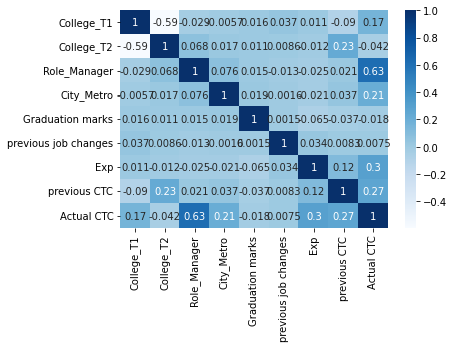

In [ ]:
# correlation matrix
sns.heatmap(dataset.corr() ,cmap = 'Blues' , linecolor = 'white', annot=True)


In [ ]:
# splitting the dataset
X = data.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[[1 0 0 ... 3 19 '55523.00']
 [0 1 0 ... 1 18 '57081.00']
 [0 1 0 ... 2 28 '60347.00']
 ...
 [0 1 0 ... 1 18 '61957.00']
 [1 0 0 ... 3 21 '53203.00']
 [0 0 1 ... 1 61 '51820.00']]


In [ ]:
print(y)

[71406.58 68005.87 76764.02 ... 66397.77 64044.38 83346.06]


## Splitting the dataset into training and test set

In [ ]:
# 80% train and 20% test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Training the Multiple Linear Regression model on the Training set

In [ ]:
# Apply linear regression to predict the CTC
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Prediction

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 79340.92  71105.71]
 [ 69070.2   62426.39]
 [ 97126.36  99734.64]
 [ 79013.38  85083.58]
 [ 65380.66  59721.74]
 [ 72210.34  69525.33]
 [ 64094.91  69764.49]
 [ 72131.04  67273.98]
 [ 67266.61  63921.31]
 [ 71842.28  61396.48]
 [ 63806.23  62314.99]
 [ 67654.41  63263.77]
 [ 70477.21  71532.81]
 [ 60131.98  65377.42]
 [ 85061.95  78089.72]
 [ 66528.48  67402.38]
 [ 74064.    76284.19]
 [ 73383.94  74544.57]
 [ 70635.98  72441.01]
 [ 91847.66  86581.05]
 [ 89327.99  80430.97]
 [ 72529.51  67700.67]
 [ 76449.24  76674.92]
 [ 87365.31  74594.62]
 [ 66371.07  62356.93]
 [ 77540.43  66943.01]
 [ 63069.47  65494.51]
 [ 68807.99  67427.14]
 [ 63643.61  59950.89]
 [ 73885.85  68928.96]
 [ 67382.7   73281.55]
 [ 97239.6  102928.71]
 [ 84466.41  77770.17]
 [ 82217.07  86354.84]
 [ 81394.31  70469.63]
 [ 67375.6   60154.54]
 [ 77156.54  65882.77]
 [ 94665.81 118651.89]
 [ 87947.69  99227.71]
 [ 67077.99  62180.74]
 [ 66644.87  64269.18]
 [ 66763.15  65685.02]
 [ 94253.08  80856.11]
 [100753.3 

In [ ]:
# calculating the r square value
from sklearn.metrics import r2_score
r2_score(y_test , y_pred)


0.6708423303083848